In [26]:
# Core Libraries
import random

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import normaltest

# Machine Learning - Scikit-learn
from sklearn import datasets, metrics, tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import (
    confusion_matrix, explained_variance_score, mean_absolute_error, ConfusionMatrixDisplay,
    mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score,accuracy_score, precision_score, recall_score, f1_score, classification_report
)
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import (
    GridSearchCV, ShuffleSplit, cross_validate, train_test_split
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, cross_val_predict
# Model Evaluation & Utilities
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [29]:
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [30]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

In [31]:
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

dummies = pd.get_dummies(df_cleaned["SalePriceCategory"], prefix="Categoria", dtype=int)
dummies.head()


C:\Users\Gerax\AppData\Local\Temp\ipykernel_23104\2577459918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=3, labels=["Económico", "Intermedio", "Caro"])
C:\Users\Gerax\AppData\Local\Temp\ipykernel_23104\2577459918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = df_cleaned["SalePriceCategory"].astype("category")
C:\Users\Gerax\AppData\Local\Temp\ipykernel_23104\2577459918.py:3: SettingWithCopyWar

,Categoria_Económico,Categoria_Intermedio,Categoria_Caro
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


In [32]:
df_cleaned = pd.concat([df_cleaned, dummies], axis=1)
train_set, test_set = train_test_split(df_cleaned, test_size=0.3, random_state=42, stratify=df_cleaned["SalePriceCategory"])


En el modulo de regresion lineal, el primero en ser realizado. Se analizo la relación entre las variables y el precio de venta, se seleccionaron aquellas con una correlación r > 0.6, ya que representan las características con mayor impacto en el valor final de la propiedad. Las variables con una correlación entre 0.3 < r < 0.6 también pueden aportar información útil, aunque su influencia es menor.

Con base en este criterio, las variables seleccionadas para el modelo son:
- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces

Algunas variables con r > 0.6 por contar con **multicolinealidad**. Por ejemplo, GrLivArea, TotalBsmtSF y 1stFlrSF ya están representadas en TotalSF, por lo que fueron descartadas. De manera similar, aunque GarageArea tiene una correlación significativa con SalePrice, se prefirió GarageCars, ya que tiene una relación más fuerte y representa mejor la capacidad del garaje. El año de construcción tambien fue ignorado a favor del año de remodelación.

Nuestro target para este modelo es encontrar si una casa es cara o no, por lo tanto se utilizada como variable de respuesta la variable es Categoria_caro

In [33]:
features = [
    "OverallQual", 
    "TotalSF", 
    "GarageCars", 
    "FullBath", 
    "YearRemodAdd", 
    "Fireplaces"
]

target = "Categoria_Caro"

Se obtienen solo las features seleccionadas con anterioridad y se realiza el modelo

In [ ]:
X_train = train_set[features]
y_train = train_set[target]


21      0
717     0
320     1
1102    0
197     1
       ..
576     0
530     0
659     0
271     1
1224    0
Name: Categoria_Caro, Length: 765, dtype: int32


In [ ]:
X_test = test_set[features]
y_test = test_set[target]

In [ ]:
features = ["OverallQual", "TotalSF", "GarageCars", "FullBath", "YearRemodAdd", "Fireplaces"]
X_train = train_set[features]
y_train = train_set["Categoria_Caro"]

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

param_grid = {
    "logisticregression__C": [0.01, 0.1, 1, 10],
    "logisticregression__penalty": ["l2"],
    "logisticregression__solver": ["lbfgs", "liblinear"]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Accuracy promedio en CV:", grid_search.best_score_)

Mejores parámetros: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Accuracy promedio en CV: 0.9058823529411765


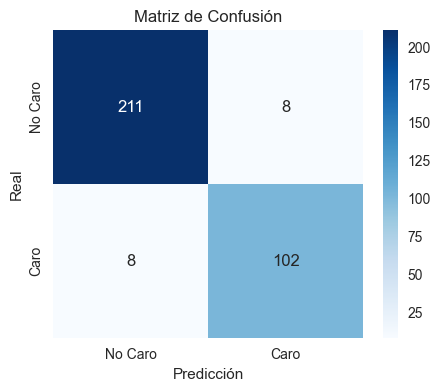

Accuracy en test set: 0.9513677811550152
              precision    recall  f1-score   support

     No Caro       0.96      0.96      0.96       219
        Caro       0.93      0.93      0.93       110

    accuracy                           0.95       329
   macro avg       0.95      0.95      0.95       329
weighted avg       0.95      0.95      0.95       329



In [ ]:
X_test = test_set[features]
y_test = test_set["Categoria_Caro"]

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Caro", "Caro"], yticklabels=["No Caro", "Caro"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print("Accuracy en test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["No Caro", "Caro"]))